In [ ]:
# Install packages
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install matplotlib
!pip install pandas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.4 MB 11.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# extract data from yahoo finance
import yfinance as yf
df = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "USDCNY=X",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

         # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,6.9583,6.9588,6.9347,6.9583,0
2016-12-20,6.9530,6.9562,6.9408,6.9530,0
2016-12-21,6.9498,6.9503,6.9393,6.9498,0
2016-12-22,6.9414,6.9494,6.9411,6.9414,0
2016-12-23,6.9493,6.9494,6.9361,6.9404,0


In [ ]:
df.shape

(1301, 5)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler

# For LSTM
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.metrics import mean_squared_error

# For Arima
import statsmodels.api as sm
from statsmodels.tsa.statespace import sarimax
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# fix random seed
np.random.seed(7)

In [ ]:
df_new = df['Close']
df_new = np.array(df_new).reshape(-1,1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_new = scaler.fit_transform(df_new)

In [ ]:
# 30 days for test
train, test = df_new[:-30], df_new[-30:]

#Processing for LSTM model
def update(data, look_back=1):
  x, y = [], []
  for i in range(len(data)-look_back-1):
    x.append(data[i:(i+look_back), 0])
    y.append(data[i+look_back, 0])
  return np.array(x), np.array(y)

x_train , y_train = update(train)
x_test , y_test = update(test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
x_train.shape

(1269, 1, 1)

In [ ]:
# define the model
model = Sequential()
model.add(LSTM(5, activation='relu', input_shape=(1,1)))
#model.add(LSTM(100, activation='relu', input_shape=(1,1)))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5)                 140       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'mse')
model.fit(x_train,y_train, epochs = 100, batch_size=1, verbose=2)

Epoch 1/100
1269/1269 - 4s - loss: 0.0484 - 4s/epoch - 3ms/step
Epoch 2/100
1269/1269 - 2s - loss: 0.0012 - 2s/epoch - 2ms/step
Epoch 3/100
1269/1269 - 2s - loss: 4.5519e-04 - 2s/epoch - 2ms/step
Epoch 4/100
1269/1269 - 3s - loss: 4.4987e-04 - 3s/epoch - 3ms/step
Epoch 5/100
1269/1269 - 3s - loss: 4.5903e-04 - 3s/epoch - 2ms/step
Epoch 6/100
1269/1269 - 3s - loss: 4.6466e-04 - 3s/epoch - 2ms/step
Epoch 7/100
1269/1269 - 3s - loss: 4.4918e-04 - 3s/epoch - 2ms/step
Epoch 8/100
1269/1269 - 3s - loss: 4.4017e-04 - 3s/epoch - 2ms/step
Epoch 9/100
1269/1269 - 4s - loss: 4.3491e-04 - 4s/epoch - 3ms/step
Epoch 10/100
1269/1269 - 2s - loss: 4.3790e-04 - 2s/epoch - 2ms/step
Epoch 11/100
1269/1269 - 2s - loss: 4.3904e-04 - 2s/epoch - 2ms/step
Epoch 12/100
1269/1269 - 2s - loss: 4.4661e-04 - 2s/epoch - 2ms/step
Epoch 13/100
1269/1269 - 2s - loss: 4.4032e-04 - 2s/epoch - 2ms/step
Epoch 14/100
1269/1269 - 2s - loss: 4.4815e-04 - 2s/epoch - 2ms/step
Epoch 15/100
1269/1269 - 2s - loss: 4.4333e-04 - 2s

In [ ]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)
prediction

array([[6.3930526],
       [6.3943806],
       [6.3840675],
       [6.3873725],
       [6.395899 ],
       [6.382465 ],
       [6.3901157],
       [6.3912516],
       [6.3894534],
       [6.395614 ],
       [6.396564 ],
       [6.3910627],
       [6.3967543],
       [6.3920097],
       [6.3696012],
       [6.3734407],
       [6.38124  ],
       [6.380957 ],
       [6.3804865],
       [6.3725033],
       [6.3514657],
       [6.3820877],
       [6.366611 ],
       [6.371754 ],
       [6.37269  ],
       [6.37269  ],
       [6.373347 ],
       [6.3797336]], dtype=float32)

In [ ]:
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

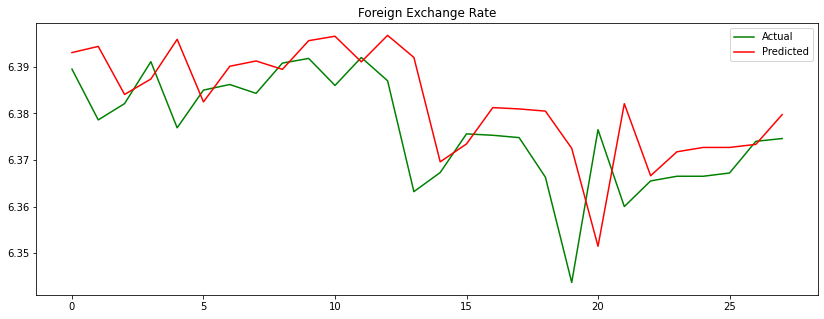

In [ ]:
#Visualizing the results
plt.figure(figsize=(14,5))
plt.title('Foreign Exchange Rate')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(prediction , label = 'Predicted', color = 'r')
plt.legend()

In [ ]:
mean_squared_error(y_test, prediction)

0.00014703965311062866

In [ ]:
mean_absolute_error(y_test, prediction)

0.008684158325195312

In [ ]:
# rmse
np.sqrt(mean_squared_error(y_test, prediction))

In [ ]:
# Arima
data = df.reset_index()[['Date', 'Close']]
X_train, X_test = data[:-30], data[-30:]
data

,Date,Close
0,2016-12-22,6.9414
1,2016-12-23,6.9404
2,2016-12-26,6.9453
3,2016-12-27,6.9447
4,2016-12-28,6.9425
...,...,...
1296,2021-12-16,6.3665
1297,2021-12-17,6.3672
1298,2021-12-20,6.3740
1299,2021-12-21,6.3746


In [ ]:
prediction = []

arima = sm.tsa.statespace.SARIMAX(X_train.Close,order=(1,1,1),seasonal_order=(1,1,1,6),
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
#get a 30 days prediction
prediction.append(arima.forecast(30))
prediction = np.array(predictions).reshape((30,))

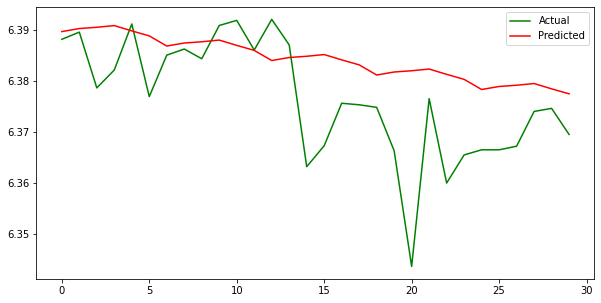

In [ ]:
y_test = data.Close[-30:]
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_test)), y_test, color='g');
plt.plot(np.arange(len(y_test)), prediction, color='r');
plt.legend(['Actual', 'Predicted']);

In [ ]:
# mae
mean_absolute_error(y_test, prediction)

0.009044196864336839

In [ ]:
# mse
mean_squared_error(y_test, prediction)

0.00014605271953963117

In [ ]:
# rmse
np.sqrt(mean_squared_error(y_test, prediction))

0.012085227326766807